```
Nama    : Avima Haamesha
NIM     : 10219084
```

# Tugas Mandiri 1
Konten:
- [Soal 1](#soal_1)
- [Soal 2](#soal-2)

<hr>

### Soal 1 <a name="soal_1"></a>
Masalah:
- Bola dijatuhkan dari ketinggian tertentu
- Ketika bola memantul, terdapat koefisien restitusi $e = 0.8$


Tujuan:
- Menentukan lama waktu bola hingga bola diam


Asumsi:
- Ketinggian awal, $H_o = 5 m$
- Gravitasi, $g = 9.8 m/s^2$
- Kecepatan awal, $v_o = 0$
- Gesekan udara diabaikan
- Acuan nol adalah lantai/tanah
- Arah ke bawah sebagai sumbu y positif

Teori:
- GLBB
    $$ \begin{equation} \tag{1}
        x_i = x_o + v.\Delta t
    \end{equation}
    $$
    
    $$ \begin{equation} \tag{2}
        v_i = v_o + a.\Delta t
    \end{equation}
    $$

- Tumbukan inelastik
    $$ \begin{equation} \tag{3}
        e = \left\lvert \frac{v_f}{v_i} \right\rvert
    \end{equation}
    $$

Analisis:
- Saat bola dijatuhkan dari $H_o$, ketinggian bola berkurang, bola mengalami percepatan karena gravitasi. Ketinggian dan kecepatan benda saat di udara berlaku persamaan GLBB.
- Saat mencapai lantai, $H_i = 0$. Arah kecepatan perlu diubah tandanya. Nilai mutlak kecepatan berkurang karena faktor koefisien restitusi, $e = 0.8$.
- Saat bola berada di puncak lokal ketika di udara, arah kecepatan akan berubah tanda karena faktor gravitasi. Dari persamaan GLBB, arah kecepatan akan otomatis berubah tanda.
- Bola disebut berhenti ketika $H_i = 0$ dan $v_i = 0$.

Implementasi Program:

Waktu hingga bola berhenti: 4.2199999999999545 sekon


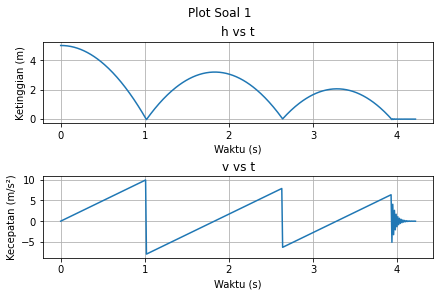

In [5]:
# TUGAS MANDIRI 1 - SOAL 1
# Nama: Avima Haamesha
# NIM: 10219084

import matplotlib.pyplot as plt

arr_h = [5]
arr_v = [0]

g = 9.8
e = 0.8     # koef restitusi

dt = 1e-2
arr_t = [0]

epsilon = 1e-2  # nol jika kurang dari epsilon

def func_hi(hi_1, vi, dt):
    hi = hi_1 - vi * dt
    return hi

def func_vi(v1_1, g, dt):
    vi = v1_1 + g * dt
    return vi

while not( (abs(arr_v[-1]) < epsilon) and (arr_h[-1] < epsilon) ):     # belum berhenti
    # ketinggian berkurang. bertambah saat jatuh
    hi = func_hi(arr_h[-1], arr_v[-1], dt)
    arr_h.append(hi)

    # jika mencapai lantai, ubah arah kecepatan
    if ((arr_h[-1] < epsilon)):
        vi = -e * arr_v[-1]
    else:   # jika di udara, berlaku GLBB
        vi = func_vi(arr_v[-1], g, dt)
    arr_v.append(vi)

    t = arr_t[-1] + dt
    arr_t.append(t)
    
    # print(vi, hi, t)

print("Waktu hingga bola berhenti: %s sekon" %t)


# plotting data untuk cek validasi hasil
fig, axs = plt.subplots(nrows=2, ncols=1, constrained_layout=True)
fig.suptitle("Plot Soal 1")

# plot ketinggian terhadap waktu
axs[0].set_title("h vs t")
axs[0].plot(arr_t, arr_h)
axs[0].set_ylabel("Ketinggian (m)")

# plot kecepatan terhadap waktu
axs[1].set_title("v vs t")
axs[1].plot(arr_t, arr_v)
axs[1].set_ylabel("Kecepatan (m/s²)")

for ax in axs:
    ax.set_xlabel("Waktu (s)")
    ax.grid(True)

plt.show()

### Soal 2 <a name="soal_2"></a>
Kasus pada soal 2 serupa dengan kasus soal 1. Namun, saat ketinggian mencapai setengah ketinggian awal, terdapat perlambatan percepatan sebesar $0.01v_i$.


Tambahan Masalah:
- Terdapat perlambatan percepatan sebesar $0.01v_i$ saat $h_i = 1/2 H_o$


Tambahan Analisis:
- Perlu dicek ketinggian setiap saat
- Jika mencapai $1/2 H_o$, hitung besar perlambatan, $koef_a = 0.01 v_i$
- Hitung kecepatan bola sesaat dari hasil percepatan, $v_i = v_o + (g-a)*\Delta t$


Implementasi Program:

Terdapat pembaruan program di baris 37-40
```python
    ...
        if hi > 1/2*arr_h[0]:
            a = -koef_a * arr_v[-1]
        else: a = 0
        vi = func_vi(arr_v[-1], (g+a), dt)
    ...
```

Waktu hingga bola berhenti: 8.739999999999858 sekon


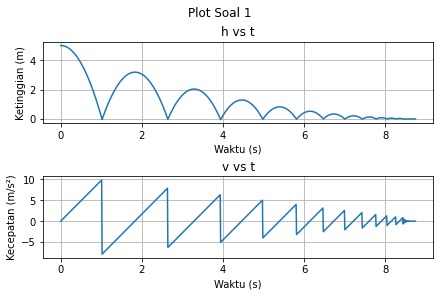

In [4]:
# TUGAS MANDIRI 1 - SOAL 2
# Nama: Avima Haamesha
# NIM: 10219084

import matplotlib.pyplot as plt

arr_h = [5]
arr_v = [0]

g = 9.8
e = 0.8     # koef restitusi
koef_a = 0.01   # koef perlambatan saat h = 1/2 ho

dt = 1e-2
arr_t = [0]

epsilon = 1e-3  # nol jika kurang dari epsilon

def func_hi(hi_1, vi, dt):
    hi = hi_1 - vi * dt
    return hi

def func_vi(v1_1, g, dt):
    vi = v1_1 + g * dt
    return vi

while not( (abs(arr_v[-1]) < epsilon) and (arr_h[-1] < epsilon) ):     # belum berhenti
    # ketinggian berkurang
    hi = func_hi(arr_h[-1], arr_v[-1], dt)
    arr_h.append(hi)

    # jika mencapai lantai, ubah arah kecepatan
    if (arr_h[-1] < epsilon):
        vi = -e * arr_v[-1]
    else:   # jika di udara, berlaku GLBB
        # ada faktor perlambatan saat h = 1/2 ho
        if hi > 1/2*arr_h[0]:
            a = -koef_a * arr_v[-1]
        else: a = 0
        vi = func_vi(arr_v[-1], (g+a), dt)
    arr_v.append(vi)

    t = arr_t[-1] + dt
    arr_t.append(t)
    
    # print(vi, hi, t)

print("Waktu hingga bola berhenti: %s sekon" %t)


# plotting data untuk cek validasi hasil
fig, axs = plt.subplots(nrows=2, ncols=1, constrained_layout=True)
fig.suptitle("Plot Soal 1")

# plot ketinggian terhadap waktu
axs[0].set_title("h vs t")
axs[0].plot(arr_t, arr_h)
axs[0].set_ylabel("Ketinggian (m)")

# plot kecepatan terhadap waktu
axs[1].set_title("v vs t")
axs[1].plot(arr_t, arr_v)
axs[1].set_ylabel("Kecepatan (m/s²)")

for ax in axs:
    ax.set_xlabel("Waktu (s)")
    ax.grid(True)

plt.show()